In [1]:
using ArenaSim
using Statistics
using PyPlot
import Random

In [2]:
deckdir = joinpath(@__DIR__, "decks", "2018-10-02");
files = readdir(deckdir);
filter!(fn -> isfile(joinpath(deckdir, fn)), files);
decks = map( fn -> ArenaSim.deckreader_mtgo_format(joinpath(deckdir, fn); strip_sideboard = true), files);
decks_sb = map( fn -> ArenaSim.deckreader_mtgo_format(joinpath(deckdir, fn); strip_sideboard = false), files);
rarecount = collect(zip(files, [ sum(x.amount * ( minimum(y->y.rarity, x.prints) == 3 ? 1 : 0) for x in z) for z in deckinfo.(decks) ]))
rarecount_sb = collect(zip(files, [ sum(x.amount * ( minimum(y->y.rarity, x.prints) == 3 ? 1 : 0) for x in z) for z in deckinfo.(decks_sb) ]));

In [3]:
perm = sortperm( [x[2] for x in rarecount] )
perm_sb = sortperm( [x[2] for x in rarecount_sb] )

function swappos!(x, i,j)
    tmp = x[j]
    x[j] = x[i]
    x[i] = tmp
    x
end

function movetoend!(x, i)
    tmp = x[i]
    deleteat!(x, i)
    push!(x, tmp)
end

movetoend!(perm, 3)
movetoend!(perm, 3)
decksrareorder = decks[perm];
decksrareorder_sb = decks_sb[perm_sb];
display(rarecount[perm])
display(rarecount_sb[perm_sb]);


20-element Array{Tuple{String,Int64},1}:
 ("Deck - Mono-Blue Tempo.txt", 4)      
 ("Deck - Azorius Control.txt", 13)     
 ("Deck - Dimir Control.txt", 15)       
 ("Deck - Golgari Graveyard.txt", 15)   
 ("Deck - Boros Aggro.txt", 18)         
 ("Deck - Selesnya Tokens.txt", 18)     
 ("Deck - Golgari Midrange.txt", 20)    
 ("Deck - Mono-Red Aggro.txt", 20)      
 ("Deck - Boros Midrange.txt", 22)      
 ("Deck - Boros Goblins.txt", 24)       
 ("Deck - Golgari Midrange (1).txt", 24)
 ("Deck - Steel Leaf Stompy.txt", 25)   
 ("Deck - Grixis Control.txt", 27)      
 ("Deck - Abzan Knights.txt", 28)       
 ("Deck - Boros Aggro (1).txt", 28)     
 ("Deck - Abzan Midrange.txt", 29)      
 ("Deck - Selesnya Stompy.txt", 31)     
 ("Deck - Abzan Midrange (1).txt", 36)  
 ("Deck - Boros Angels (1).txt", 14)    
 ("Deck - Boros Angels.txt", 14)        

20-element Array{Tuple{String,Int64},1}:
 ("Deck - Mono-Blue Tempo.txt", 4)      
 ("Deck - Azorius Control.txt", 15)     
 ("Deck - Dimir Control.txt", 19)       
 ("Deck - Golgari Graveyard.txt", 20)   
 ("Deck - Mono-Red Aggro.txt", 21)      
 ("Deck - Golgari Midrange.txt", 22)    
 ("Deck - Boros Aggro.txt", 24)         
 ("Deck - Boros Angels.txt", 24)        
 ("Deck - Boros Angels (1).txt", 26)    
 ("Deck - Boros Midrange.txt", 26)      
 ("Deck - Selesnya Tokens.txt", 28)     
 ("Deck - Golgari Midrange (1).txt", 29)
 ("Deck - Grixis Control.txt", 30)      
 ("Deck - Abzan Knights.txt", 32)       
 ("Deck - Steel Leaf Stompy.txt", 33)   
 ("Deck - Abzan Midrange.txt", 34)      
 ("Deck - Boros Goblins.txt", 34)       
 ("Deck - Boros Aggro (1).txt", 35)     
 ("Deck - Selesnya Stompy.txt", 35)     
 ("Deck - Abzan Midrange (1).txt", 40)  

In [4]:
Random.seed!(1234)
pars = SimParameters(icrs_per_pack = ArenaSim.icrgen_qc(0.5, 0, 0), welcome_bundle = true);
results_rareorder = simulate(5000, deckinfo.(decksrareorder); parameters = pars);
results_rareorder_sb = simulate(5000, deckinfo.(decksrareorder_sb); parameters = pars);

In [5]:
quantiles = mapslices(x -> quantile(x, [0.1,0.25,0.5,0.75,0.9]), reduce(+, values(results_rareorder.packs_opened)), dims = 1)'
vcat(["" "10%" "25%" "50%" "75%" "90%"], hcat( "Deck " .* string.(1:20), quantiles))

21×6 Array{Any,2}:
 ""           "10%"    "25%"    "50%"    "75%"    "90%"
 "Deck 1"    0.9      1.0      7.0     19.0     21.0   
 "Deck 2"   30.0     34.0     38.0     42.0     46.0   
 "Deck 3"   43.0     51.0     58.0     66.0     72.0   
 "Deck 4"   30.0     36.0     45.0     53.0     60.0   
 "Deck 5"   45.0     54.0     60.0     70.0     78.0   
 "Deck 6"   33.0     42.0     48.0     56.0     63.0   
 "Deck 7"   15.0     19.0     25.0     30.0     35.0   
 "Deck 8"   46.0     54.0     63.0     72.0     81.0   
 "Deck 9"   13.0     19.0     26.0     36.0     48.0   
 "Deck 10"   0.0      7.0     16.0     24.0     29.0   
 "Deck 11"   0.0      6.0     12.0     18.0     24.0   
 "Deck 12"  21.0     29.0     35.0     42.0     48.0   
 "Deck 13"  20.0     27.0     34.0     42.0     52.0   
 "Deck 14"   0.0      6.0     13.0     23.0     29.0   
 "Deck 15"   0.0      0.0      0.0      6.0      6.0   
 "Deck 16"   0.0      0.0      0.0      0.0      0.0   
 "Deck 17"   0.0      1.0    

In [6]:
quantiles_sb = mapslices(x -> quantile(x, [0.1,0.25,0.5,0.75,0.9]), reduce(+, values(results_rareorder_sb.packs_opened)), dims = 1)'
vcat(["" "10%" "25%" "50%" "75%" "90%"], hcat( "Deck " .* string.(1:20), quantiles_sb))

21×6 Array{Any,2}:
 ""           "10%"    "25%"    "50%"    "75%"    "90%"
 "Deck 1"   12.0     14.0     21.0     31.0     33.0   
 "Deck 2"   42.0     46.0     51.0     57.0     66.0   
 "Deck 3"   48.0     57.0     65.0     75.0     84.0   
 "Deck 4"   20.0     30.0     42.0     54.0     63.0   
 "Deck 5"   60.0     66.0     78.0     86.0     93.0   
 "Deck 6"   18.0     23.0     29.0     33.0     40.0   
 "Deck 7"   30.0     35.0     42.0     50.0     58.0   
 "Deck 8"   18.0     24.0     35.0     54.0     78.0   
 "Deck 9"   14.0     21.0     29.0     33.0     44.0   
 "Deck 10"  24.0     36.0     54.0     66.0     82.1   
 "Deck 11"   0.0     12.0     28.0     36.0     48.0   
 "Deck 12"   0.0      0.0      0.0     18.0     30.0   
 "Deck 13"  23.0     30.0     42.0     57.0     63.0   
 "Deck 14"   0.0      8.0     18.0     28.0     30.0   
 "Deck 15"  12.0     24.0     31.0     42.0     49.0   
 "Deck 16"   0.0      5.0     18.0     30.0     35.0   
 "Deck 17"   0.0      0.0    

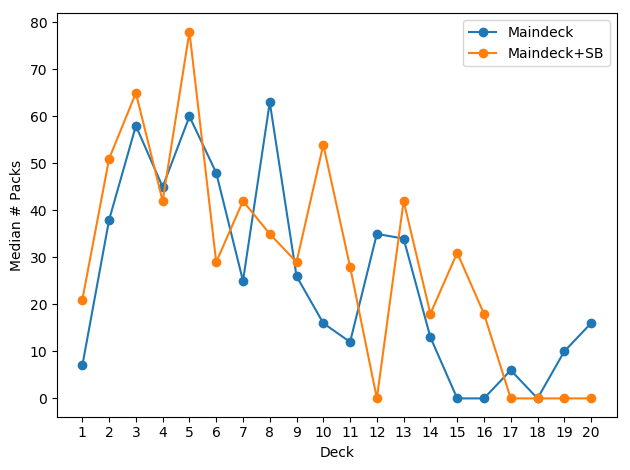

In [7]:
plot(1:20, quantiles[:,3],  marker = "o", label = "Maindeck")
plot(1:20, quantiles_sb[:,3], marker = "o", label = "Maindeck+SB")
xticks(1:20);
legend()
xlabel("Deck")
ylabel("Median # Packs");
tight_layout();